In [1]:
import depoSimulator_symmetry
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import torch
import pyvista as pv
import pandas as pd
from scipy import interpolate
import CollisionModule

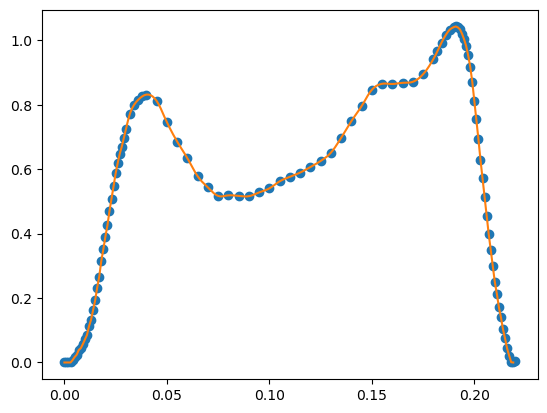

In [2]:
erosion = pd.read_excel('./erosionData.xlsx')

r = erosion['r'].to_numpy()/1000
measure = erosion['measure'].to_numpy()
minus_m = measure < 0
measure[minus_m] = 0

erosion_func = interpolate.interp1d(r, measure, kind='quadratic')

xnew = np.arange(0, 0.22, 0.001)
ynew = erosion_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(r, measure, 'o', xnew, ynew, '-')
plt.show()

(656436,)


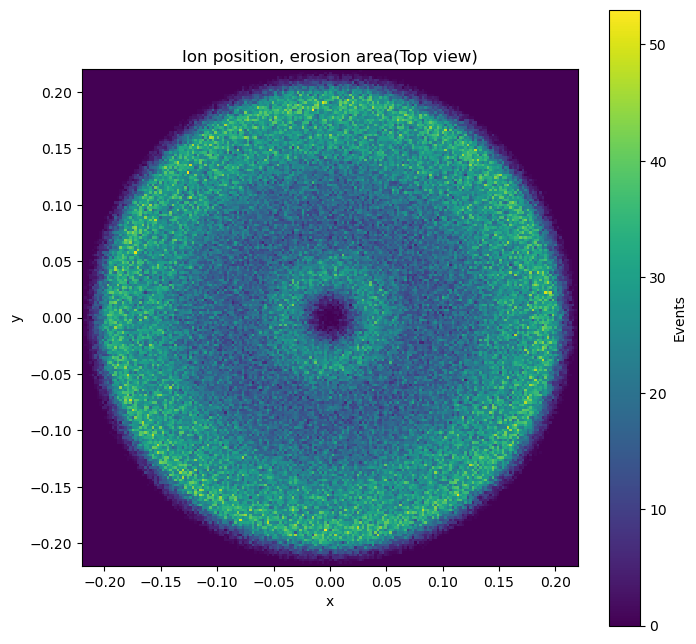

In [3]:
erosion_bins = 200
erosion_r = np.arange(0, 0.22, 0.22/erosion_bins)
erosion_r = erosion_r + 0.22/erosion_bins/2
# print(erosion_r)

erosion_event = erosion_func(erosion_r)
erosion_event_minus = erosion_event < 0
erosion_event[erosion_event_minus] = 0
for i in range(erosion_event.shape[0]):
    erosion_event[i] *= (0.22/erosion_bins)**2 + 2*i*(0.22/erosion_bins)**2
erosion_event *= 2e7

gen_dist_x = np.array([])
gen_dist_y = np.array([])

# r = np.linspace(0, 0.22, 22)
bins = 200
r = 0.22/bins

for i in range(bins):
    # print(i)
    # print(erosion_event[0][i])
    theta = np.random.rand(int(erosion_event[i]))*2*np.pi
    # print(theta.shape)
    # print(np.multiply((np.random.rand(int(erosion_event[0][i]))*0.01 + i*0.01), np.cos(theta)).shape)
    gen_dist_x = np.concatenate((gen_dist_x, np.multiply((np.random.rand(int(erosion_event[i]))*r + i*r), np.cos(theta))))
    # print(np.array(gen_dist_x).shape)
    gen_dist_y = np.concatenate((gen_dist_y, np.multiply((np.random.rand(int(erosion_event[i]))*r + i*r), np.sin(theta))))

print(gen_dist_x.shape)

xbins = np.linspace(-0.22,0.22,200)
ybins = np.linspace(-0.22,0.22,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [4]:
xbins = np.linspace(-0.22,0.22,80)
ybins = np.linspace(-0.22,0.22,80)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))

xbins = np.linspace(-22,22,79)
ybins = np.linspace(-22,22,79)
x, y = np.meshgrid(xbins, ybins)

grid = pv.StructuredGrid(x, y, H/200)
grid.plot()

Widget(value='<iframe src="http://localhost:49239/index.html?ui=P_0x1541b4e1fd0_0&reconnect=auto" class="pyvis…

In [5]:
def rfunc(x): #Release factor function
    # print("-------rfunc------")
    # print(x)
    n = 1.6
    beta = -0.7
    y = np.cos(x) ** n * (1 + beta * np.cos(x) ** 2)# * (n ** 2 + 4 * n + 3) / (n * beta + n + beta + 3) /2 / pi
    return y

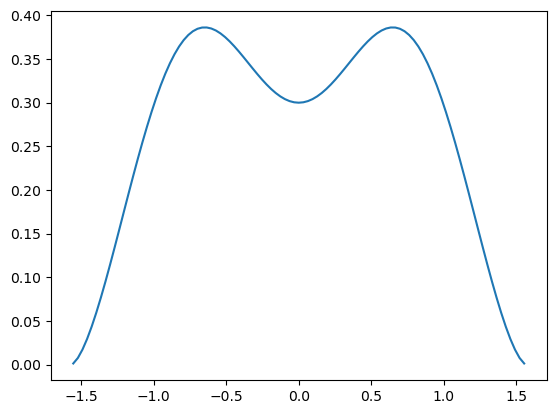

In [6]:
theta_bins_size = 100
theta_bins = np.linspace(-np.pi/2, np.pi/2, theta_bins_size)
theta_hist_x = theta_bins + np.pi/((theta_bins_size-1)*2)
theta_hist_x = theta_hist_x[:-1]

theta_hist_y = rfunc(theta_hist_x)

fig, ax = plt.subplots(1, 1)

ax.plot(theta_hist_x, theta_hist_y)

(array([  1301.,   7496.,  16886.,  28722.,  42502.,  58068.,  75085.,
         92828., 111986., 131321., 151094., 171266., 190982., 210877.,
        230101., 248661., 267071., 283137., 299118., 313954., 326679.,
        338996., 350189., 358302., 366330., 372833., 376694., 379780.,
        382096., 382020., 381284., 380046., 376552., 372703., 367749.,
        363441., 356846., 350946., 345037., 338487., 331932., 325651.,
        320041., 314634., 310324., 305850., 302703., 299960., 298089.,
        297310., 296702., 299077., 299554., 302385., 305339., 310399.,
        314722., 320295., 325385., 332175., 338946., 343811., 352322.,
        356554., 362849., 367992., 372521., 377073., 379800., 380717.,
        382958., 381738., 379718., 377121., 372043., 366569., 358456.,
        350041., 338615., 327253., 314051., 299392., 282920., 266464.,
        249144., 230109., 210707., 191452., 171300., 150690., 131609.,
        111550.,  93130.,  74966.,  58065.,  42560.,  28657.,  16875.,
      

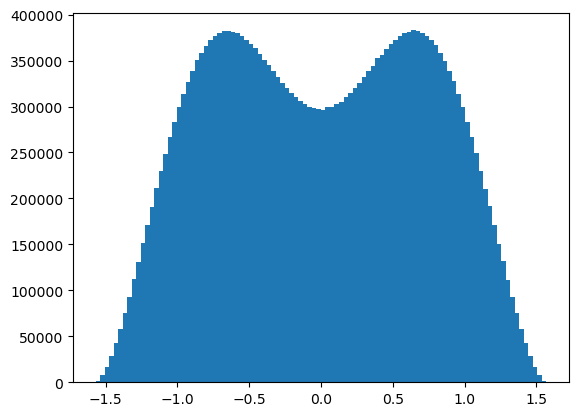

In [7]:
theta_sample = np.array([])
theta_hist_y *= 1e6
for i in range(theta_bins.shape[0] - 1):
    theta_sample = np.concatenate(( theta_sample, np.random.uniform(theta_bins[i], theta_bins[i+1], int(theta_hist_y[i]))))

plt.hist(theta_sample, bins=100)

(array([  32.,  210.,  390.,  674., 1093., 1398., 1840., 2242., 2776.,
        3237., 3688., 4185., 4656., 5229., 5759., 6193., 6587., 6971.,
        7413., 7616., 8214., 8357., 8591., 8926., 9164., 9042., 9378.,
        9441., 9312., 9459., 9486., 9375., 9225., 9096., 9092., 9002.,
        8747., 8564., 8480., 8487., 8066., 8154., 7929., 7762., 7750.,
        7497., 7396., 7441., 7370., 7414., 7467., 7371., 7571., 7404.,
        7547., 7637., 7825., 8014., 7977., 8346., 8347., 8338., 8650.,
        8748., 8957., 9062., 9146., 9404., 9228., 9260., 9358., 9405.,
        9241., 9373., 9224., 9042., 8695., 8575., 8219., 8089., 7720.,
        7346., 6976., 6660., 6173., 5715., 5269., 4603., 4346., 3731.,
        3155., 2732., 2343., 1881., 1498., 1076.,  677.,  395.,  183.,
          31.]),
 array([-1.57065200e+00, -1.53923811e+00, -1.50782423e+00, -1.47641034e+00,
        -1.44499645e+00, -1.41358256e+00, -1.38216867e+00, -1.35075478e+00,
        -1.31934089e+00, -1.28792700e+00, -1.25651

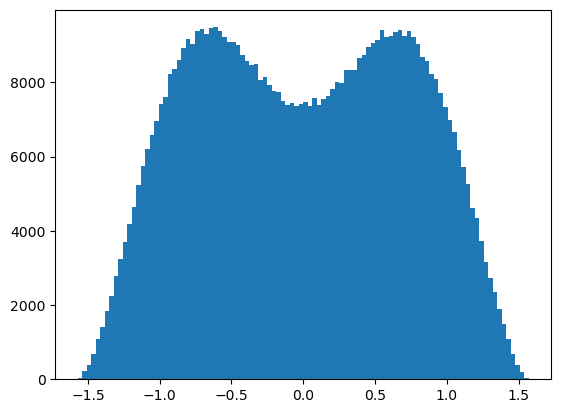

In [8]:
np.random.shuffle(theta_sample)
plt.hist(theta_sample[:int(gen_dist_x.shape[0])], bins=100)

In [9]:
def Energy_theta_func(C, enery, theta):
    U = 3.36 #binding
    m = 0.212
    Alpha = 0.14
    n = 0.5
    A = 13
    # m_t = 44.803928e-27
    # m_i = 66.335e-27
    m_t = 27
    m_i = 40
    q = 2 - m_t/(4*m_i)
    Q = 0.55
    E_inc = 437 # eVsb Vsb self bias
    return C * enery/(enery + U)**(3-2*m)*(1 - ((U + enery)/(U + Alpha*E_inc))**n)*np.exp(-A*((m_i/m_t)*((U + enery * np.cos(theta)**q)/E_inc))**Q)

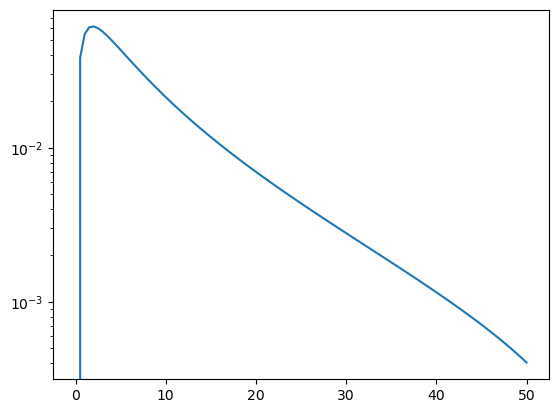

In [10]:
theta = 0.45*np.pi
enery = np.linspace(0, 50, 100)

fig, ax = plt.subplots(1,1)
ax.plot(enery, Energy_theta_func(10, enery, theta))
ax.set_yscale('log')

In [11]:
enery_bins = np.linspace(0, 50, 100)

energy_theta_tuple = []
for j in range(theta_hist_x.shape[0]):
    enery_sample = np.array([])
    for i in range(enery_bins.shape[0] - 1):
        enery_sample = np.concatenate(( enery_sample, np.random.uniform(enery_bins[i], enery_bins[i+1], int(Energy_theta_func(10, enery_bins[i], theta_hist_x[j]) *1e6))))
    energy_theta_tuple.append(enery_sample)

for i in range(len(energy_theta_tuple)):
    np.random.shuffle(energy_theta_tuple[i])

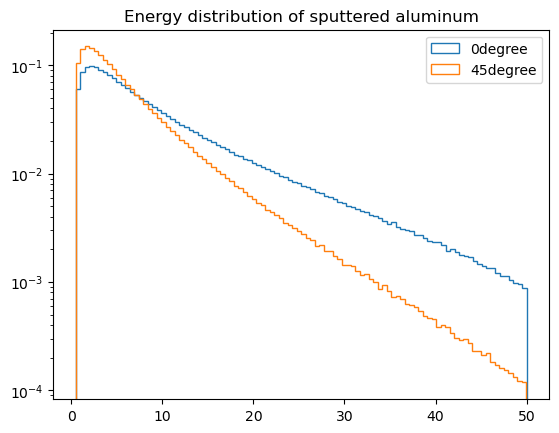

In [17]:
fig, ax = plt.subplots()
ax.set_title("Energy distribution of sputtered aluminum")
ax.hist(energy_theta_tuple[0],density=True, bins=100,histtype='step', stacked=True, fill=False, label='0degree')
ax.hist(energy_theta_tuple[25],density=True, bins=100,histtype='step', stacked=True, fill=False, label='45degree')
ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [18]:
test_sample = theta_sample[:int(gen_dist_x.shape[0])]
theta_hist_sample = np.histogram(test_sample, bins=99)

energy_sample = np.array([])
for i in range(99):
    energy_theta_sample = energy_theta_tuple[i][:theta_hist_sample[0][i] ]
    energy_sample = np.concatenate((energy_sample, energy_theta_sample))

print(energy_sample.shape)
print(gen_dist_x.shape[0])

(656436,)
656436


(array([5.0000e+00, 7.0000e+00, 9.0000e+00, 1.2000e+01, 9.0000e+00,
        1.8000e+01, 1.7000e+01, 1.6000e+01, 2.0000e+01, 3.1000e+01,
        3.0000e+01, 3.7000e+01, 4.1000e+01, 4.1000e+01, 5.0000e+01,
        8.3000e+01, 7.1000e+01, 8.5000e+01, 8.9000e+01, 1.2700e+02,
        1.2200e+02, 1.3000e+02, 1.4900e+02, 1.9000e+02, 1.8000e+02,
        2.0800e+02, 2.3600e+02, 2.8000e+02, 2.9000e+02, 3.5600e+02,
        3.8400e+02, 4.1300e+02, 4.6400e+02, 5.4500e+02, 5.7700e+02,
        6.7700e+02, 7.4000e+02, 8.0500e+02, 8.5900e+02, 9.3800e+02,
        1.0870e+03, 1.1770e+03, 1.2770e+03, 1.4520e+03, 1.6310e+03,
        1.7810e+03, 1.9340e+03, 2.1780e+03, 2.3820e+03, 2.6880e+03,
        2.8250e+03, 3.1670e+03, 3.4160e+03, 3.7720e+03, 4.1370e+03,
        4.4990e+03, 4.9690e+03, 5.4630e+03, 5.9000e+03, 6.4140e+03,
        6.9450e+03, 7.6100e+03, 8.3100e+03, 9.1730e+03, 9.9140e+03,
        1.0697e+04, 1.1591e+04, 1.2492e+04, 1.3316e+04, 1.4239e+04,
        1.5234e+04, 1.6295e+04, 1.7326e+04, 1.82

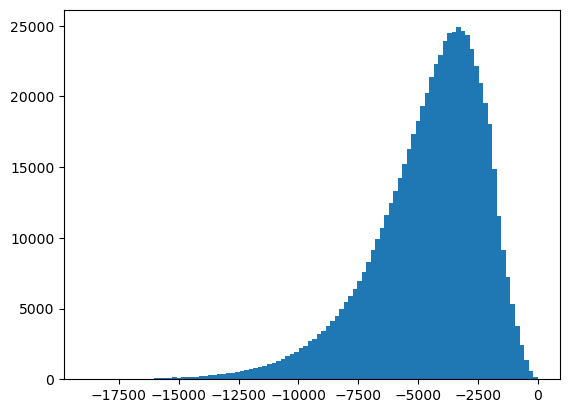

In [19]:
ev = 1.602176634e-19
velosity_norm_energy = np.sqrt((energy_sample*ev)*2/44.803928e-27)

test_sample_sort = np.sort(test_sample)

theta = test_sample_sort
phi = np.random.rand(gen_dist_x.shape[0])*2*np.pi
vel_x = np.cos(phi)*np.sin(theta)*velosity_norm_energy
vel_y = np.sin(phi)*np.sin(theta)*velosity_norm_energy
vel_z = np.cos(theta)*velosity_norm_energy

velosity_matrix = np.array([vel_x, vel_y, -vel_z]).T

rng = np.random.default_rng()
velosity_matrix = rng.permuted(velosity_matrix, axis=0)

plt.hist(velosity_matrix[:, 2], bins=100)

(array([7.0000e+00, 6.0000e+00, 4.0000e+00, 1.5000e+01, 1.5000e+01,
        2.3000e+01, 2.3000e+01, 3.6000e+01, 4.8000e+01, 5.6000e+01,
        6.0000e+01, 7.5000e+01, 1.0100e+02, 1.1800e+02, 1.3100e+02,
        1.8100e+02, 2.2400e+02, 2.7900e+02, 2.9400e+02, 3.8300e+02,
        3.8800e+02, 4.8700e+02, 5.5000e+02, 6.6700e+02, 8.1400e+02,
        9.4500e+02, 1.2260e+03, 1.3910e+03, 1.5490e+03, 1.8720e+03,
        2.2390e+03, 2.6770e+03, 3.1500e+03, 3.6290e+03, 4.3040e+03,
        5.1900e+03, 6.2770e+03, 7.1560e+03, 8.5440e+03, 1.0203e+04,
        1.2032e+04, 1.3971e+04, 1.6439e+04, 1.8824e+04, 2.1980e+04,
        2.5096e+04, 2.8270e+04, 3.2560e+04, 3.7999e+04, 5.2528e+04,
        5.5852e+04, 3.8679e+04, 3.2961e+04, 2.8735e+04, 2.5293e+04,
        2.1905e+04, 1.9434e+04, 1.6525e+04, 1.4001e+04, 1.2068e+04,
        1.0190e+04, 8.6970e+03, 7.3140e+03, 6.1990e+03, 5.2030e+03,
        4.3830e+03, 3.8930e+03, 3.1750e+03, 2.6660e+03, 2.2510e+03,
        1.8670e+03, 1.6000e+03, 1.3720e+03, 1.17

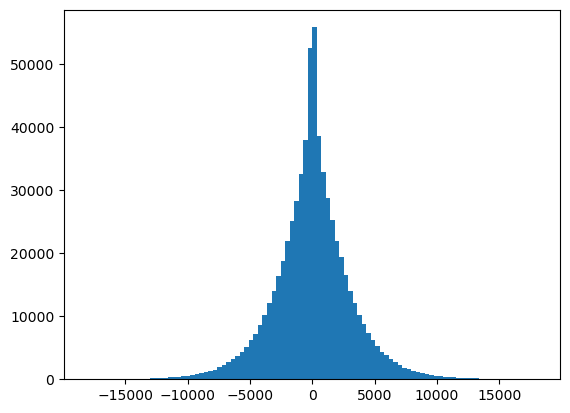

In [21]:
plt.hist(velosity_matrix[:, 1], bins=100)

In [23]:
from scipy.stats import rv_continuous
from scipy.stats.sampling import NumericalInversePolynomial
from scipy.special import gamma, factorial

In [24]:
def diVr_func(d_refi, eVr, wi):
    kb = 1.380649e-23
    Tref = 300
    ev = 1.60217663e-19
    diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*ev))**(wi-1/2)*gamma(5/2 - wi))
    return diVr

In [25]:
def DXsec(d_refi, eVr, wi, chi):
    if chi == 0:
        return 0
    if chi != 0:
        return diVr_func(d_refi, eVr, wi)**2/(np.pi * np.sin(chi))*(1 - chi/np.pi)

C:\Users\URCS049\AppData\Local\Temp\ipykernel_19188\1183322800.py:15: RuntimeWarning: [objid: PINV.003] 102 : center moved into domain of distribution => 
  rng50 = NumericalInversePolynomial(dist50, domain=[0.1, np.pi], random_state=urng)
C:\Users\URCS049\AppData\Local\Temp\ipykernel_19188\1183322800.py:19: RuntimeWarning: [objid: PINV.004] 102 : center moved into domain of distribution => 
  rng100 = NumericalInversePolynomial(dist100, domain=[0.1, np.pi], random_state=urng)


[0.67284089 0.12323238 0.43941376 ... 0.23374666 0.97462236 0.5485741 ]


(array([84909., 66404., 54029., 46062., 39897., 34734., 31020., 27937.,
        25311., 23388., 21158., 19748., 18506., 17105., 16122., 15346.,
        14011., 13573., 12922., 11991., 11601., 11241., 10598., 10224.,
         9807.,  9398.,  9126.,  8736.,  8500.,  8049.,  7964.,  7658.,
         7464.,  7302.,  7059.,  6755.,  6515.,  6574.,  6158.,  6131.,
         5965.,  5751.,  5670.,  5676.,  5426.,  5447.,  5232.,  5063.,
         4995.,  4863.,  4828.,  4808.,  4665.,  4696.,  4584.,  4521.,
         4468.,  4237.,  4122.,  4171.,  4055.,  4160.,  4088.,  3905.,
         3941.,  3821.,  3788.,  3740.,  3728.,  3710.,  3596.,  3704.,
         3580.,  3551.,  3579.,  3484.,  3513.,  3564.,  3354.,  3507.,
         3396.,  3329.,  3376.,  3332.,  3309.,  3319.,  3315.,  3416.,
         3307.,  3366.,  3272.,  3236.,  3232.,  3177.,  3190.,  3146.,
         3228.,  3217.,  3124.,  3124.]),
 array([0.1000003 , 0.13041568, 0.16083106, 0.19124644, 0.22166182,
        0.2520772 , 0.2824

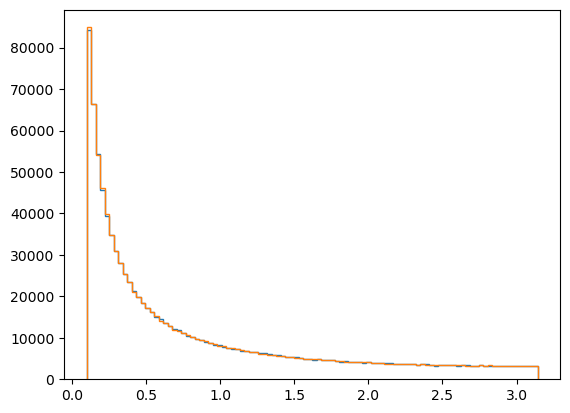

In [27]:
class DCS_gen_50(rv_continuous):
    "Dcs distribution"
    def _pdf(self, x):
       return DXsec((4.614 + 4.151)/2*1e-10, 0.01, 0.7205, x)
    

class DCS_gen_100(rv_continuous):
    "Dcs distribution"
    def _pdf(self, x):
       return DXsec((4.614 + 4.151)/2*1e-10, 50, 0.7205, x)
    
urng = np.random.default_rng()

dist50 =DCS_gen_50()
rng50 = NumericalInversePolynomial(dist50, domain=[0.1, np.pi], random_state=urng)
rvs50 = rng50.rvs(size=1000000)

dist100 =DCS_gen_100()
rng100 = NumericalInversePolynomial(dist100, domain=[0.1, np.pi], random_state=urng)
rvs100 = rng100.rvs(size=1000000)
print(rvs100)
plt.hist(rvs100, bins= 100, histtype='step', stacked=True, fill=False)
plt.hist(rvs50, bins= 100, histtype='step', stacked=True, fill=False)

In [28]:
print(rvs50.shape)

(1000000,)


In [29]:
transport = CollisionModule.transport(pressure_pa=0.1, timeStep= 1e-9, temperature=300, cellSize=[240, 240, 150], celllength=2, chamberSize=[0.24, 0.24], DXsec=rvs50)

In [36]:
release_pos = np.array([gen_dist_x, gen_dist_y, np.zeros_like(gen_dist_x)]).T

print(release_pos.shape)
print(velosity_matrix.shape)

(656436, 3)
(656436, 3)


In [37]:
np.save('release_pos',release_pos)

In [35]:
np.save('release_pos',release_pos)
np.save('velosity_matrix', velosity_matrix)
np.save('DXsec_Al', rvs50)

In [33]:
transport.runE(p0=release_pos, v0=velosity_matrix, time=1e-7)

running:   0%|                                                            | 0.00/100 [00:00<?, ?B/s]


(array([], dtype=float64), array([[0, 0, 0]]))